In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
x=np.array([5.86,2.93,1.465,0.7325,0.36625,0.183125,0.091563,0.045781,0.022891,0.011445,0.005723,0])
y=np.array([91523.7,90715.8,87582.3,71583.8,51311,34180.9,30596.2,29253.2,30259.8,26771.3,26320.3,25208.3])

In [3]:
def gfp_fit_v1(x, Zmax, Keff, neff, beta):
    gfp=Zmax*(x/Keff)**neff/(1.0+(x/Keff)**neff)+beta
    return gfp

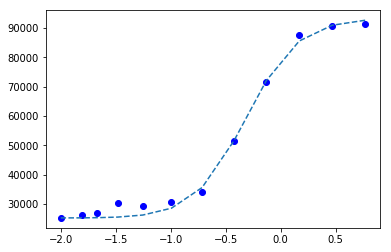

[  6.81340513e+04   4.72786433e-01   1.81022988e+00   2.52083000e+04]


In [4]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.log10(x+1e-2),y,'bo')
params,params_cov=optimize.curve_fit(gfp_fit_v1,x,y,p0=[92000.0,20.0,0.0,0.0],bounds=([0,0,0,0],[np.inf,np.inf,np.inf,y[-1]]))
ax.plot(np.log10(x+1e-2),gfp_fit_v1(x,params[0],params[1],params[2],params[3]),ls='--')
plt.show()
print params